In [1]:
import pylab as py
import numpy as np

In [7]:
def process(alpha,x0,a,b,q):
    t = np.arange(a,b)
    x = np.zeros(len(t)+1)
    x[0] = x0
    for i in range(1,len(t)):
        x[i] = alpha*x[i-1] *(1-x[i-1]) + np.random.normal(0,q)
    return x,t
a = 1
b = 100
x0 = np.random.normal(0.1,0.01)
q = 0.01
r = 0.05
alpha = 0.9
x,t = process(alpha,x0,a,b,q)

In [8]:
y = x[1:] + np.random.normal(0,r)

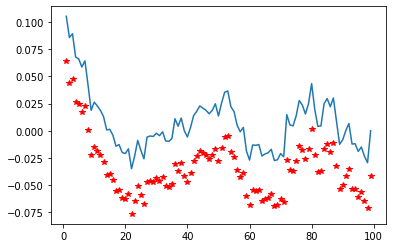

In [9]:
py.plot(t,x[1:])
py.plot(t,y,'r*')

In [ ]:
def kalman(alpha,q,r,T,mu):
    gain = np.zeros(T)
    mu_new = np.zeros(T)
    sig_new = np.zeros(T)
    mu_old = alpha*mu * (1-mu) 
    sig_old = q2 + alpha*sig*alpha
    for i in range(1,T+1):
        gain[i] = sig_old*h*(h*sig_old*h+r2)**(-1) # gain matrix Kt
        if i in nodata:
            mu_new[i] = mu_old #returns the old mu value when there is no data
        else:
            mu_new[i] = mu_old + gain[i] * (y[i] - h*mu_old) #returns the new mu value
        sig_new[i] = (1-gain[i]*h)*sig_old #returns new sigma (variance)
        mu_old = alpha*mu_new[i]
        sig_old = q2 + alpha**2*sig_new[i]
    return mu_new,sig_new,gain

In [ ]:
mu_new, sig_new, gain = kalman(1,0,r**2,q**2,alpha,y,T,mu)